<a href="https://colab.research.google.com/github/kanhaiya-S/kanhaiya-S/blob/main/Estimation_of_obesity_level_116_kanhaiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning project :
    Kanhaiya Sharma
    11619011921
    AI & DS

## Estimation of obesity levels based on eating habits and physical condition



Dataset link: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

references: https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
# data = pd.read_csv("C:/Users/kanha/Downloads/ObesityDataSet_raw_and_data_sinthetic.csv")
data = pd.read_csv("/content/drive/MyDrive/PROJECTS/ML project/ObesityDataSet_raw_and_data_sinthetic.csv")

In [150]:
df = data.copy()

In [151]:
df.shape

(2111, 17)

In [152]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [153]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [154]:
# change columns names
# refer:- https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub

df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']
df.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
Frequency of consumption of vegetables,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
Number of main meals,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
Consumption of water daily,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
Physical activity frequency,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
Time using technology devices,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   object 
 1   Age                                        2111 non-null   float64
 2   Height                                     2111 non-null   float64
 3   Weight                                     2111 non-null   float64
 4   Family History with Overweight             2111 non-null   object 
 5   Frequent consumption of high caloric food  2111 non-null   object 
 6   Frequency of consumption of vegetables     2111 non-null   float64
 7   Number of main meals                       2111 non-null   float64
 8   Consumption of food between meals          2111 non-null   object 
 9   Smoke                                      2111 non-null   object 
 10  Consumption of water dai

In [157]:
df.isna().sum()
# no missing value present

Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
Family History with Overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64

In [158]:
#type conversion

# roundoff age to int
df['Age'] = df['Age'].round(0).astype(int)

df['Number of main meals']= df['Number of main meals'].astype(int)

df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].astype(int)
#Frequency of consumption of vegetables : 1- never , 2- sometimes , 3 - always


In [159]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.315964,6.357078,14.00,20.000000,23.000000,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
Frequency of consumption of vegetables,2111.0,2.213169,0.599397,1.00,2.000000,2.000000,3.000000,3.00
Number of main meals,2111.0,2.523449,0.830288,1.00,2.000000,3.000000,3.000000,4.00
Consumption of water daily,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
Physical activity frequency,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
Time using technology devices,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [160]:
df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21,1.620000,64.000000,yes,no,2,3,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21,1.520000,56.000000,yes,no,3,3,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800000,77.000000,yes,no,2,3,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800000,87.000000,no,no,3,3,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.780000,89.800000,no,no,2,1,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.710730,131.408528,yes,yes,3,3,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.748584,133.742943,yes,yes,3,3,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.752206,133.689352,yes,yes,3,3,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3,3,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Male      1068
Female    1043
Name: Gender, dtype: int64

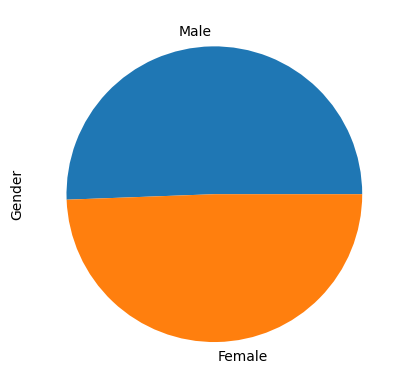

In [161]:
df['Gender'].value_counts().plot(kind ='pie')
df['Gender'].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: Consumption of alcohol, dtype: int64

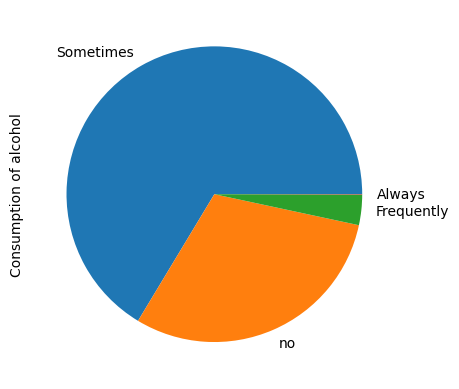

In [162]:
df['Consumption of alcohol'].value_counts().plot(kind ='pie')
df['Consumption of alcohol'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: Obesity, dtype: int64

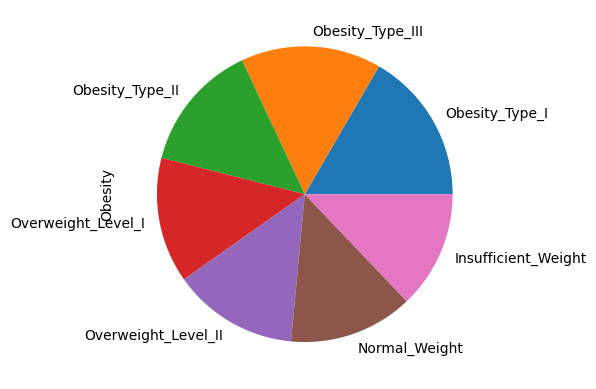

In [163]:
df['Obesity'].value_counts().plot(kind='pie')
df['Obesity'].value_counts()

<Axes: ylabel='Frequency'>

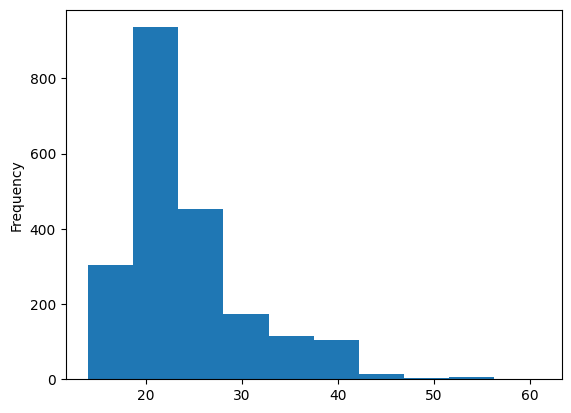

In [164]:
df['Age'].plot(kind = 'hist')

<Axes: >

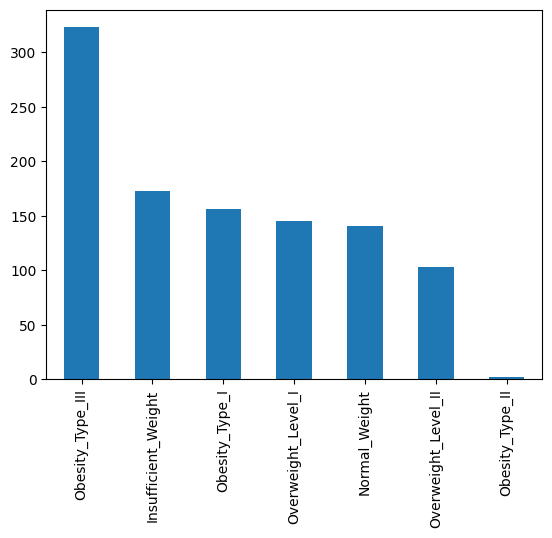

In [165]:
# obesity type in females
df[df['Gender'] == 'Female']['Obesity'].value_counts().plot(kind = 'bar')

# we can see obesity type 3 is more in females followed by insufficent weight

<Axes: >

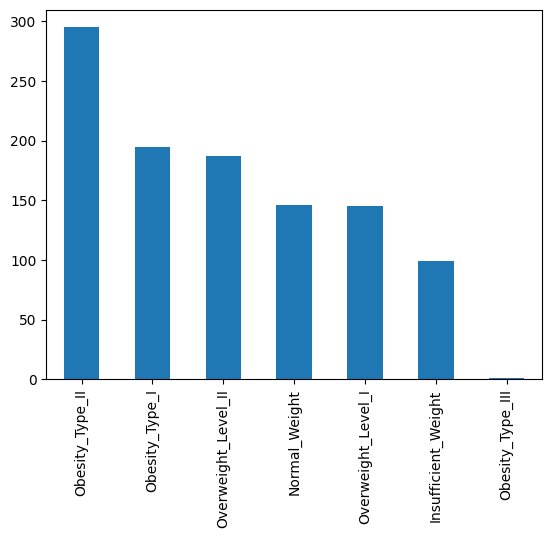

In [166]:
# obesity type in males
df[df['Gender'] == 'Male']['Obesity'].value_counts().plot(kind = 'bar')

## we can see obesity type 2 is more in males followed by obesity type 1

In [167]:
# female_obesity = df['Gender'] == 'Female'
# ob = df['Obesity'] == 'Normal_Weight'
# df[female_obesity & ob]['Obesity'].value_counts()

# function to find obesity type by gender
# def obesity_type_by_gender(gender,obesity_type):
#     gender_obe = df['Gender'] == gender
#     ob = df['Obesity'] == obesity_type
#     return df[gender_obe & ob]
# female_obe3 = obesity_type_by_gender('Female','Obesity_Type_III')
# female_obe3

In [168]:
df['Gender'] == 'Female'
df['Gender'].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

In [169]:
df['Smoke'].value_counts()

no     2067
yes      44
Name: Smoke, dtype: int64

3    1362
1     395
2     285
4      69
Name: Number of main meals, dtype: int64

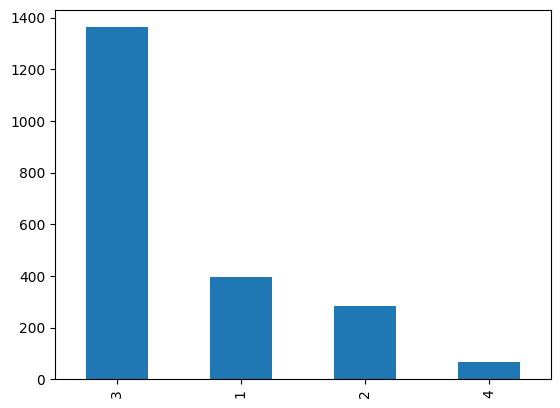

In [170]:
df['Number of main meals']
df['Number of main meals'].dtype
df['Number of main meals'].value_counts().plot(kind = 'bar')
df['Number of main meals'].value_counts()

Obesity_Type_III       324
Normal_Weight          206
Obesity_Type_II        185
Obesity_Type_I         180
Insufficient_Weight    175
Overweight_Level_I     156
Overweight_Level_II    136
Name: Obesity, dtype: int64

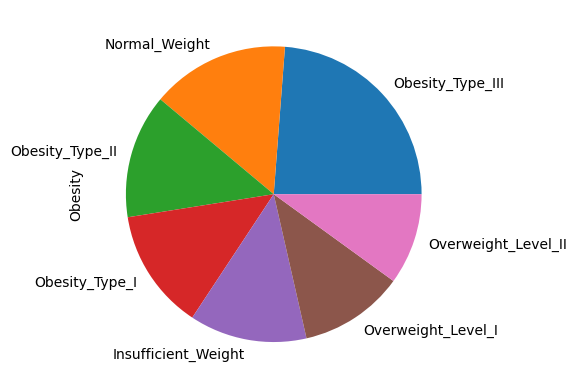

In [171]:
# for people having 3 main meals
no_main_meals_3 = df['Number of main meals'] == 3
df[no_main_meals_3]['Obesity'].value_counts().plot(kind = 'pie')
df[no_main_meals_3]['Obesity'].value_counts()

Obesity_Type_I         100
Overweight_Level_I      86
Overweight_Level_II     75
Normal_Weight           52
Insufficient_Weight     49
Obesity_Type_II         33
Name: Obesity, dtype: int64

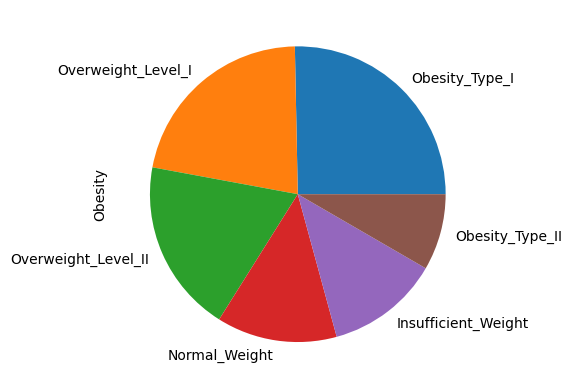

In [172]:
# for 1 main meal
no_main_meals_1 = df['Number of main meals'] == 1
df[no_main_meals_1]['Obesity'].value_counts().plot(kind = 'pie')
df[no_main_meals_1]['Obesity'].value_counts()

Normal_Weight          29
Insufficient_Weight    29
Overweight_Level_I      8
Overweight_Level_II     2
Obesity_Type_II         1
Name: Obesity, dtype: int64

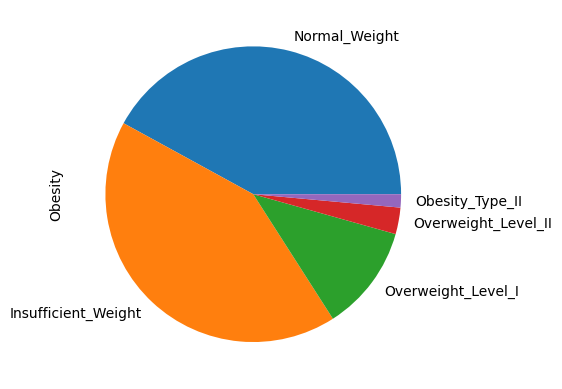

In [173]:
# for 4 main meal
no_main_meals_4 = df['Number of main meals'] == 4
df[no_main_meals_4]['Obesity'].value_counts().plot(kind = 'pie')
df[no_main_meals_4]['Obesity'].value_counts()

Obesity_Type_II        78
Overweight_Level_II    77
Obesity_Type_I         71
Overweight_Level_I     40
Insufficient_Weight    19
Name: Obesity, dtype: int64

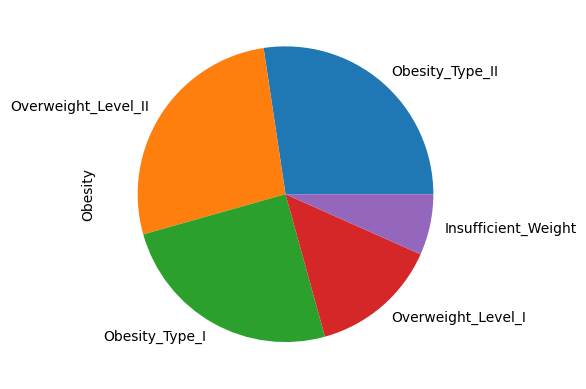

In [174]:
# for 2 main meal
no_main_meals_2 = df['Number of main meals'] == 2
df[no_main_meals_2]['Obesity'].value_counts().plot(kind = 'pie')
df[no_main_meals_2]['Obesity'].value_counts()

In [175]:
# correlations
# corr = df.corr(method = 'pearson')
corr = df.corr()
corr

<ipython-input-175-9a7c681f97c5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices
Age,1.000000,-0.026184,0.203452,-0.016192,-0.070768,-0.045605,-0.145147,-0.296601
Height,-0.026184,1.000000,0.463136,-0.070032,0.214633,0.213376,0.294709,0.051912
Weight,0.203452,0.463136,1.000000,0.201087,0.126058,0.200575,-0.051436,-0.071561
Frequency of consumption of vegetables,-0.016192,-0.070032,0.201087,1.000000,0.138510,0.101429,-0.009630,-0.115745
Number of main meals,-0.070768,0.214633,0.126058,0.138510,1.000000,0.066163,0.107412,0.036985
Consumption of water daily,-0.045605,0.213376,0.200575,0.101429,0.066163,1.000000,0.167236,0.011965
Physical activity frequency,-0.145147,0.294709,-0.051436,-0.009630,0.107412,0.167236,1.000000,0.058562
Time using technology devices,-0.296601,0.051912,-0.071561,-0.115745,0.036985,0.011965,0.058562,1.000000


<ipython-input-176-3ed5ac43de09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True,linewidths=.5)


<Axes: >

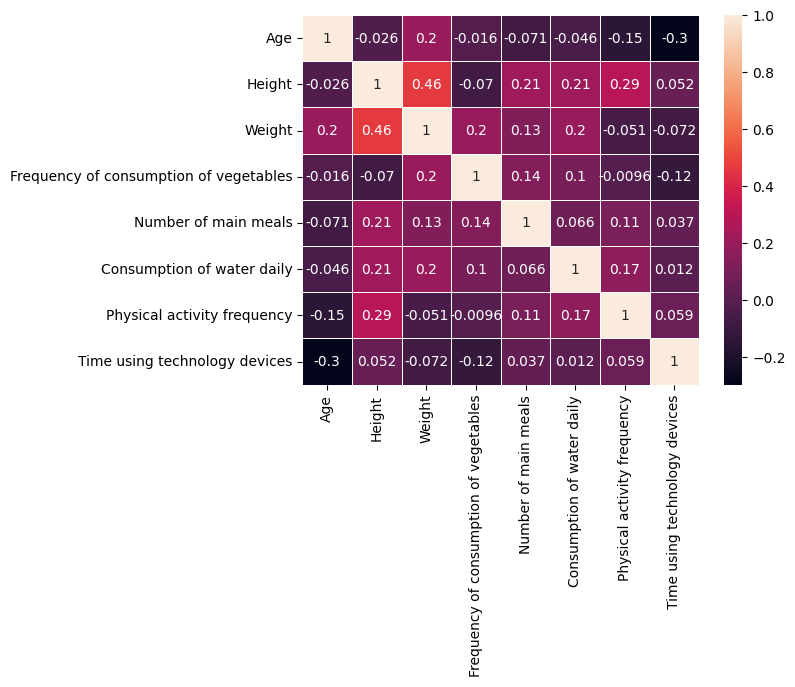

In [176]:
sns.heatmap(df.corr(), annot = True,linewidths=.5)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   object 
 1   Age                                        2111 non-null   int64  
 2   Height                                     2111 non-null   float64
 3   Weight                                     2111 non-null   float64
 4   Family History with Overweight             2111 non-null   object 
 5   Frequent consumption of high caloric food  2111 non-null   object 
 6   Frequency of consumption of vegetables     2111 non-null   int64  
 7   Number of main meals                       2111 non-null   int64  
 8   Consumption of food between meals          2111 non-null   object 
 9   Smoke                                      2111 non-null   object 
 10  Consumption of water dai

In [178]:
df.tail()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
2106,Female,21,1.710730,131.408528,yes,yes,3,3,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.748584,133.742943,yes,yes,3,3,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.752206,133.689352,yes,yes,3,3,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3,3,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24,1.738836,133.472641,yes,yes,3,3,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


## Data Preprocessing

In [179]:
# dictionary mapping for categorical data
# Gender - 'Female':0, 'Male':1

print(df['Gender'].value_counts())
df['Gender']= df['Gender'].replace({'Female':0, 'Male':1})
df['Gender'].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64


1    1068
0    1043
Name: Gender, dtype: int64

In [180]:
# Family History with Overweight - 'no' : 0,'yes':1

print(df['Family History with Overweight'].value_counts())
df['Family History with Overweight'] = df['Family History with Overweight'].replace({'no' : 0,'yes':1})
df['Family History with Overweight'].value_counts()

yes    1726
no      385
Name: Family History with Overweight, dtype: int64


1    1726
0     385
Name: Family History with Overweight, dtype: int64

In [181]:
# Frequent consumption of high caloric food - 'no' : 0,'yes':1
print(df['Frequent consumption of high caloric food'].value_counts())
df['Frequent consumption of high caloric food'] = df['Frequent consumption of high caloric food'].replace({'no' : 0,'yes':1})
df['Frequent consumption of high caloric food'].value_counts()

yes    1866
no      245
Name: Frequent consumption of high caloric food, dtype: int64


1    1866
0     245
Name: Frequent consumption of high caloric food, dtype: int64

In [182]:
# Consumption of food between meals - 'no' : 0,'Sometimes':1,'Frequently':2,'Always':3

print(df['Consumption of food between meals'].value_counts())
df['Consumption of food between meals'] = df['Consumption of food between meals'].replace({'no' : 0,'Sometimes':1,'Frequently':2,'Always':3})
df['Consumption of food between meals'].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: Consumption of food between meals, dtype: int64


1    1765
2     242
3      53
0      51
Name: Consumption of food between meals, dtype: int64

In [183]:
# Smoke - 'no' : 0,'yes':1
print(df['Smoke'].value_counts())
df['Smoke'] = df['Smoke'].replace({'no' : 0,'yes':1})
df['Smoke'].value_counts()

no     2067
yes      44
Name: Smoke, dtype: int64


0    2067
1      44
Name: Smoke, dtype: int64

In [184]:
# Calories consumption monitoring - 'no' : 0,'yes':1
print(df['Calories consumption monitoring'].value_counts())
df['Calories consumption monitoring'] = df['Calories consumption monitoring'].replace({'no' : 0,'yes':1})
df['Calories consumption monitoring'].value_counts()

no     2015
yes      96
Name: Calories consumption monitoring, dtype: int64


0    2015
1      96
Name: Calories consumption monitoring, dtype: int64

In [185]:
# Consumption of alcohol - 'no' : 0,'Sometimes':1,'Frequently':2,'Always':3

print(df['Consumption of alcohol'].value_counts())
df['Consumption of alcohol'] = df['Consumption of alcohol'].replace({'no' : 0,'Sometimes':1,'Frequently':2,'Always':3})
df['Consumption of alcohol'].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: Consumption of alcohol, dtype: int64


1    1401
0     639
2      70
3       1
Name: Consumption of alcohol, dtype: int64

In [186]:
# Transportation used - 'Public_Transportation' : 0,'Automobile':1,'Walking':2,'Motorbike':3,'Bike':4

print(df['Transportation used'].value_counts())
df['Transportation used'] = df['Transportation used'].replace({'Public_Transportation' : 0,'Automobile':1,'Walking':2,'Motorbike':3,'Bike':4})
df['Transportation used'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: Transportation used, dtype: int64


0    1580
1     457
2      56
3      11
4       7
Name: Transportation used, dtype: int64

In [187]:
df.info()
# here all objects are typeconverted to int or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   int64  
 1   Age                                        2111 non-null   int64  
 2   Height                                     2111 non-null   float64
 3   Weight                                     2111 non-null   float64
 4   Family History with Overweight             2111 non-null   int64  
 5   Frequent consumption of high caloric food  2111 non-null   int64  
 6   Frequency of consumption of vegetables     2111 non-null   int64  
 7   Number of main meals                       2111 non-null   int64  
 8   Consumption of food between meals          2111 non-null   int64  
 9   Smoke                                      2111 non-null   int64  
 10  Consumption of water dai

In [188]:
#df['Obesity'].value_counts()
# Smoke - 'no' : 0,'yes':1
print(df['Obesity'].value_counts())
df['Obesity'] = df['Obesity'].replace({'Insufficient_Weight' : 0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6})
df['Obesity'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: Obesity, dtype: int64


4    351
6    324
5    297
2    290
3    290
1    287
0    272
Name: Obesity, dtype: int64

## Standardization

In [189]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# input - x
# target - y
# x = df.drop('Obesity',axis = 1)
# y = df['Obesity']
x = df.iloc[:,:-1] # dependent features
y = df.iloc[:,-1]  # independent feature
print(x.shape)
print(y.shape) # target

(2111, 16)
(2111,)


In [190]:
x.tail()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used
2106,0,21,1.710730,131.408528,1,1,3,3,1,0,1.728139,0,1.676269,0.906247,1,0
2107,0,22,1.748584,133.742943,1,1,3,3,1,0,2.005130,0,1.341390,0.599270,1,0
2108,0,23,1.752206,133.689352,1,1,3,3,1,0,2.054193,0,1.414209,0.646288,1,0
2109,0,24,1.739450,133.346641,1,1,3,3,1,0,2.852339,0,1.139107,0.586035,1,0
2110,0,24,1.738836,133.472641,1,1,3,3,1,0,2.863513,0,1.026452,0.714137,1,0


In [191]:
scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = StandardScaler()

x = scaler.fit_transform(x)

# model implementation

In [192]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state=0)

## MODELS:
1. Decision tree classifier
2. Random forest
3. KNN classifier
4. Support vector classifier
5. Logistic regression
6. Naive Bayes Classifier
7. AdaBoost Classifier

## Decision Tree Classifier

In [193]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle
models = ['Decision tree classifier', 'Random forest', 'KNN classifier', 'Support vector classifier', 'Logistic regression', 'Naive Bayes Classifier','AdaBoost Classifier']
model_accuracy = []

In [194]:
# tree = DecisionTreeClassifier(max_depth=30)
tree = DecisionTreeClassifier(criterion='entropy',max_depth=30)

tree.fit(x_train,y_train)  # fitting training data
tree_pred = tree.predict(x_test)  # prediction

print(f"Accuracy on train set: {tree.score(x_train,y_train)}")
print(f"Accuracy on test set: {tree.score(x_test,y_test)}")
print(classification_report(y_test,tree_pred))  # classification report

Accuracy on train set: 1.0
Accuracy on test set: 0.9495268138801262
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.86      0.88      0.87        43
           2       0.93      0.89      0.91        45
           3       0.90      0.95      0.93        40
           4       0.96      1.00      0.98        53
           5       1.00      0.97      0.99        38
           6       1.00      1.00      1.00        56

    accuracy                           0.95       317
   macro avg       0.95      0.95      0.95       317
weighted avg       0.95      0.95      0.95       317



Accuracy score on test set: 0.9495268138801262


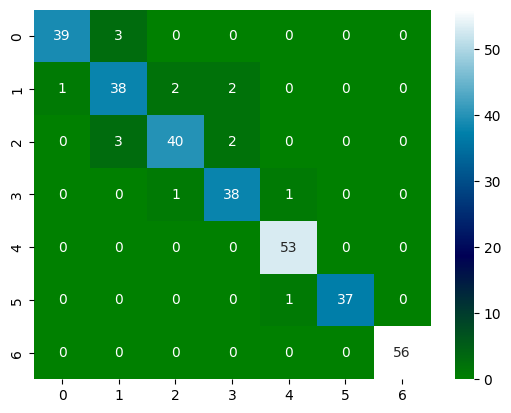

In [195]:
print(f"Accuracy score on test set: {accuracy_score(y_test, tree_pred)}")

tree_cm = confusion_matrix(y_test, tree_pred)
sns.heatmap(tree_cm,annot=True,linecolor = 'red',cbar= True, cmap='ocean')

model_accuracy.append(accuracy_score(y_test, tree_pred))

In [196]:
# pickle.dump(tree,open('DecisionTree.pkl','wb'))

## Random Forest

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [198]:
# cross validation to find optimal value of n_estimator

forest = RandomForestClassifier()

n_estimators_values = [50, 100,125, 150, 175, 200,250, 300,350]
cv_scores = []

for n_estimators in n_estimators_values:
    forest.n_estimators = n_estimators
    scores = cross_val_score(forest, x_train, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find the optimal value of n_estimators
optimal_n_estimators = n_estimators_values[cv_scores.index(max(cv_scores))]
print("optimal n_estimator value : ",optimal_n_estimators)

optimal n_estimator value :  250


In [199]:
# forest = RandomForestClassifier()
forest = RandomForestClassifier(n_estimators = optimal_n_estimators)

forest.fit(x_train,y_train)
forest_pred = forest.predict(x_test)

print(f"Accuracy on train set: {tree.score(x_train,y_train)}")
print(f"Accuracy on test set: {forest.score(x_test,y_test)}")
print(classification_report(y_test,forest_pred))

Accuracy on train set: 1.0
Accuracy on test set: 0.9526813880126183
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.80      0.95      0.87        43
           2       0.95      0.89      0.92        45
           3       0.97      0.93      0.95        40
           4       0.98      0.98      0.98        53
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        56

    accuracy                           0.95       317
   macro avg       0.96      0.95      0.95       317
weighted avg       0.96      0.95      0.95       317



Accuracy score on test set: 0.9526813880126183


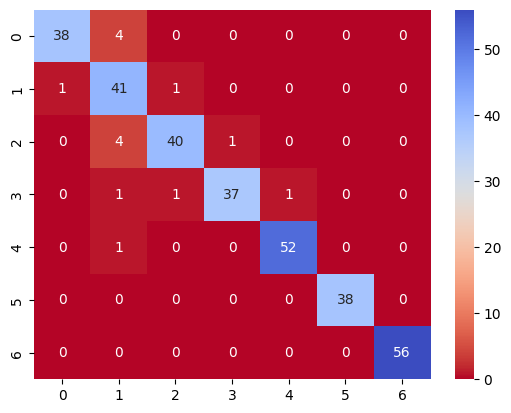

In [200]:
print(f"Accuracy score on test set: {accuracy_score(y_test, forest_pred)}")

forest_cm = confusion_matrix(y_test, forest_pred)
sns.heatmap(forest_cm,annot=True,linecolor = 'red',cbar= True, cmap='coolwarm_r')

model_accuracy.append(accuracy_score(y_test, forest_pred))

In [201]:
# pickle.dump(forest,open('RandomForest.pkl','wb'))

## KNN

In [202]:
from sklearn.neighbors import KNeighborsClassifier

In [203]:
# cross validation to find optimal value of n_neighbors
knn = KNeighborsClassifier()
n_neighbors_values = [2,3, 5, 7, 10, 15]  # Example values to try
cv_scores = []

# Perform cross-validation for different values of n_neighbors
for n_neighbors in n_neighbors_values:
    knn.n_neighbors = n_neighbors
    scores = cross_val_score(knn, x_train, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find the optimal value of n_neighbors
optimal_n_neighbors = n_neighbors_values[cv_scores.index(max(cv_scores))]
optimal_n_neighbors

2

In [204]:
# knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors = optimal_n_neighbors)

knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

print(f"Accuracy on train set: {knn.score(x_train,y_train)}")
print(f"Accuracy on test set: {knn.score(x_test,y_test)}")
print(classification_report(y_test,knn_pred))

Accuracy on train set: 0.9180602006688964
Accuracy on test set: 0.804416403785489
              precision    recall  f1-score   support

           0       0.63      0.88      0.73        42
           1       0.52      0.40      0.45        43
           2       0.76      0.82      0.79        45
           3       0.83      0.72      0.77        40
           4       0.91      0.81      0.86        53
           5       0.95      0.95      0.95        38
           6       1.00      1.00      1.00        56

    accuracy                           0.80       317
   macro avg       0.80      0.80      0.79       317
weighted avg       0.81      0.80      0.80       317



Accuracy score on test set: 0.804416403785489


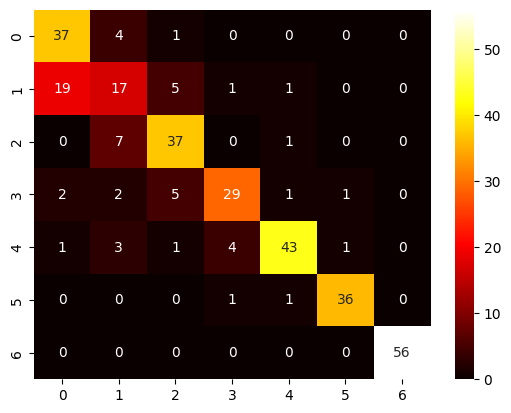

In [205]:
print(f"Accuracy score on test set: {accuracy_score(y_test, knn_pred)}")

knn_pred_cm = confusion_matrix(y_test,knn_pred)
sns.heatmap(knn_pred_cm, annot=True, cbar= True, cmap='hot')

model_accuracy.append(accuracy_score(y_test, knn_pred))

In [206]:
# pickle.dump(knn,open('KNN.pkl','wb'))

# SVC - support vector classifier

In [207]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [208]:
svc = SVC(kernel="rbf")

param_grid = {'gamma': [0.1, 0.5, 1.0], 'C': [0.1, 1.0, 5.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Find the optimal gamma value and c value
optimal_gamma = grid_search.best_params_['gamma']
optimal_C = grid_search.best_params_['C']
print(optimal_gamma)
print(optimal_C)

0.5
5.0


In [209]:
svc = SVC(kernel="rbf", gamma=optimal_C, C=optimal_C)

svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

print(f"Accuracy on train set: {svc.score(x_train,y_train)}")
print(f"Accuracy on test set: {svc.score(x_test, y_test)}")
print(classification_report(y_test, svc_pred))

Accuracy on train set: 0.9983277591973244
Accuracy on test set: 0.8706624605678234
              precision    recall  f1-score   support

           0       0.97      0.76      0.85        42
           1       0.59      0.79      0.67        43
           2       0.74      0.76      0.75        45
           3       0.94      0.85      0.89        40
           4       0.98      0.92      0.95        53
           5       0.97      0.97      0.97        38
           6       1.00      1.00      1.00        56

    accuracy                           0.87       317
   macro avg       0.88      0.87      0.87       317
weighted avg       0.89      0.87      0.88       317



Accuracy score on test set: 0.8706624605678234


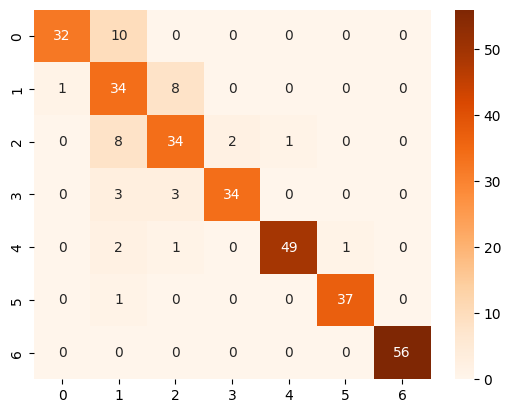

In [210]:
print(f"Accuracy score on test set: {accuracy_score(y_test, svc_pred)}")

svc_pred_cm = confusion_matrix(y_test,svc_pred)
sns.heatmap(svc_pred_cm,annot=True,cbar= True, cmap='Oranges')

model_accuracy.append(accuracy_score(y_test, svc_pred))

In [211]:
# pickle.dump(svc,open('SVC.pkl','wb'))

## Logistic regression

In [212]:
## logistic regression
from sklearn.linear_model import LogisticRegression

In [213]:
logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=70)

logistic.fit(x_train,y_train)
logistic_pred = logistic.predict(x_test)

print(f"Accuracy on train set: {logistic.score(x_train,y_train)}")
print(f"Accuracy on test set: {logistic.score(x_test, y_test)}")
print(classification_report(y_test, logistic_pred))

Accuracy on train set: 0.7513935340022296
Accuracy on test set: 0.8012618296529969
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        42
           1       0.74      0.47      0.57        43
           2       0.77      0.73      0.75        45
           3       0.60      0.60      0.60        40
           4       0.85      0.83      0.84        53
           5       0.82      0.97      0.89        38
           6       0.95      1.00      0.97        56

    accuracy                           0.80       317
   macro avg       0.79      0.79      0.78       317
weighted avg       0.80      0.80      0.79       317



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score on test set: 0.8012618296529969


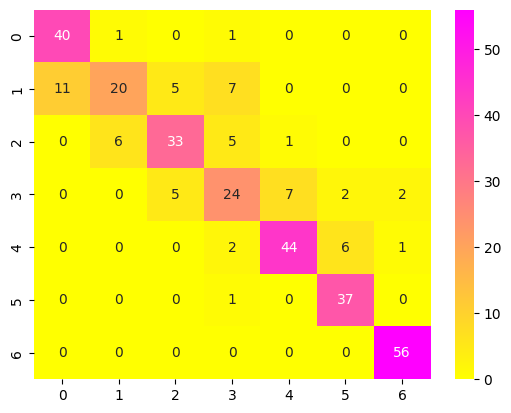

In [214]:
logistic_pred_cm = confusion_matrix(y_test,logistic_pred)

sns.heatmap(logistic_pred_cm,annot=True,cbar= True, cmap='spring_r')
print(f"Accuracy score on test set: {accuracy_score(y_test, logistic_pred)}")

model_accuracy.append(accuracy_score(y_test, logistic_pred))

In [215]:
# pickle.dump(logistic,open('Logistic.pkl','wb'))

## Naive Bayes

In [216]:
from sklearn.naive_bayes import GaussianNB

In [217]:
naivebayes = GaussianNB()

naivebayes.fit(x_train, y_train)
naivebayes_pred = naivebayes.predict(x_test)

print(f"Accuracy on train set: {naivebayes.score(x_train,y_train)}")
print(f"Accuracy on test set: {naivebayes.score(x_test, y_test)}")
print(classification_report(y_test, naivebayes_pred))

Accuracy on train set: 0.5585284280936454
Accuracy on test set: 0.5930599369085173
              precision    recall  f1-score   support

           0       0.43      0.98      0.60        42
           1       0.44      0.16      0.24        43
           2       0.43      0.07      0.12        45
           3       0.70      0.17      0.28        40
           4       0.50      0.77      0.61        53
           5       0.65      0.87      0.74        38
           6       1.00      1.00      1.00        56

    accuracy                           0.59       317
   macro avg       0.59      0.57      0.51       317
weighted avg       0.60      0.59      0.53       317



Accuracy score on test set: 0.5930599369085173


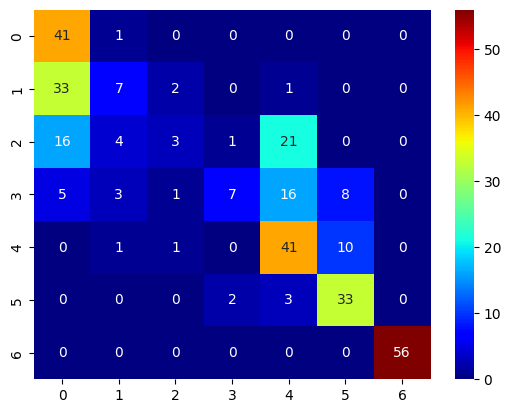

In [218]:
naivebayes_pred_cm = confusion_matrix(y_test,naivebayes_pred)

sns.heatmap(naivebayes_pred_cm,annot=True,cbar= True, cmap='jet')
print(f"Accuracy score on test set: {accuracy_score(y_test, naivebayes_pred)}")

model_accuracy.append(accuracy_score(y_test, naivebayes_pred))

In [219]:
# pickle.dump(naivebayes,open('NaiveBayes.pkl','wb'))

## AdaBoost Classifier

In [220]:
from sklearn.ensemble import AdaBoostClassifier

In [221]:
adaboost = AdaBoostClassifier()

adaboost.fit(x_train, y_train)
adaboost_pred = adaboost.predict(x_test)

print(f"Accuracy on train set: {adaboost.score(x_train,y_train)}")
print(f"Accuracy on test set: {adaboost.score(x_test, y_test)}")
print(classification_report(y_test, adaboost_pred))

Accuracy on train set: 0.310479375696767
Accuracy on test set: 0.27129337539432175
              precision    recall  f1-score   support

           0       1.00      0.05      0.09        42
           1       0.36      0.70      0.48        43
           2       0.50      0.04      0.08        45
           3       0.28      0.78      0.42        40
           4       0.16      0.34      0.22        53
           5       0.60      0.08      0.14        38
           6       0.00      0.00      0.00        56

    accuracy                           0.27       317
   macro avg       0.41      0.28      0.20       317
weighted avg       0.39      0.27      0.19       317



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score on test set: 0.27129337539432175


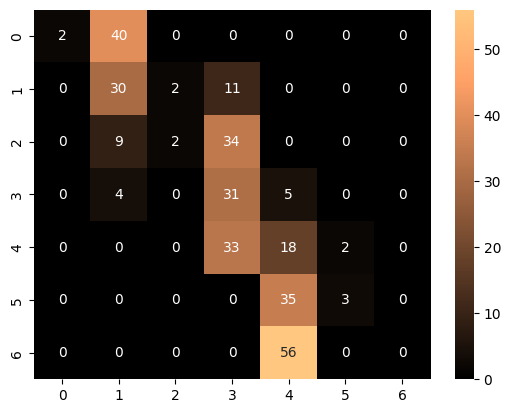

In [222]:
adaboost_pred_cm = confusion_matrix(y_test,adaboost_pred)

sns.heatmap(adaboost_pred_cm,annot=True,cbar= True, cmap='copper')
print(f"Accuracy score on test set: {accuracy_score(y_test, adaboost_pred)}")

model_accuracy.append(accuracy_score(y_test, adaboost_pred))

In [223]:
# pickle.dump(adaboost,open('Adaboost.pkl','wb'))

In [224]:
# accuracy of different models:
print(f"Accuracy of decision tree model : {accuracy_score(y_test, tree_pred)}")
print(f"Accuracy of random forest model : {accuracy_score(y_test, forest_pred)}")
print(f"Accuracy of KNN classifier model : {accuracy_score(y_test, knn_pred)}")
print(f"Accuracy of Support vector classifier  model : {accuracy_score(y_test, svc_pred)}")
print(f"Accuracy of logistic regression model : {accuracy_score(y_test, logistic_pred)}")
print(f"Accuracy of Naive Bayes model : {accuracy_score(y_test, naivebayes_pred)}")
print(f"Accuracy of AdaBoost Classifier model : {accuracy_score(y_test, adaboost_pred)}")

Accuracy of decision tree model : 0.9495268138801262
Accuracy of random forest model : 0.9526813880126183
Accuracy of KNN classifier model : 0.804416403785489
Accuracy of Support vector classifier  model : 0.8706624605678234
Accuracy of logistic regression model : 0.8012618296529969
Accuracy of Naive Bayes model : 0.5930599369085173
Accuracy of AdaBoost Classifier model : 0.27129337539432175


<BarContainer object of 7 artists>

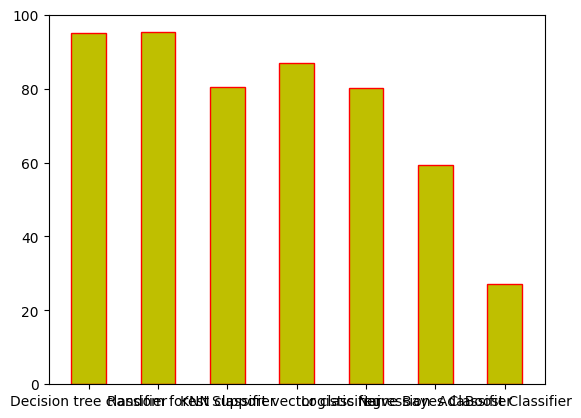

In [225]:
model_accuracy = np.array(model_accuracy)
plt.bar(models, model_accuracy*100, width =0.5, color ='y',edgecolor ='r')